# Lab Assignment One: Exploring Table Data 
**Christopher Cook, Bonita Davis, Anekah Kelley, Davis Lynn**

## 1. Business Understanding 

### 1.1. Overview

Music has a long and vibrant foothold in international culture, and defining a method of developing popular songs has long been sought after. The company is trying to figure out what makes songs historically popular, and how they can make artists create songs that will bring the company success. 

The Spotify data has 15,149 observations and 18 features. This data was collected directly from the Spotify API, allowing for additional attributes such as Loudness, Speechiness, etc. The dataset is free to download on Kaggle, and matches the requirements specified within the Lab 1 Requirements.

The company can use this data to determine trends among modern and traditional artist's popularity, and the qualities of their music that continue to keep them that way. In addition to this, we can see how artists have performed historically, and make predictions about how future albums might perform.

It's important to understand when looking at this data, though, that many of these attributes are somewhat subjective and difficult to measure. Using this dataset, which has thousands of songs that were all rated on the same scale, helps music producers have a metric that they can use to compare songs and to determine how to make new, popular songs.

Through plotting this data, we might be to find relationships between features, and determine potential hypotheses about the correlation between popularity and other attributes. 

Accuracy is important to the company, especially in matters of corporate strategy. As we are using regression based prediction for popularity, we define an accurate value for each data point by taking the chi-square test at each point of data, replacing the observed value with the predicted and the expected with the known value, a chi square below 5 we find to be accurate.

The goal of analyzing this data would be to allow music producers and singers to predict how well their song would perform based on various metrics.

### 1.2. Statistics
- 15150 Tracks
- 3042 Artists
- 125 Years of Music (1899 - 2024)
- 19 Genres
- 18 Attributes

## 2. Data Understanding

### 2.1 Data Description

In [5]:
import pandas as pd 

# find the data type
df = pd.read_csv('C:\CS1342\Programs\ML-Lab-1\ClassicHit.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15149 entries, 0 to 15148
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15149 non-null  object 
 1   Artist            15149 non-null  object 
 2   Year              15149 non-null  int64  
 3   Duration          15149 non-null  int64  
 4   Time_Signature    15149 non-null  int64  
 5   Danceability      15149 non-null  float64
 6   Energy            15149 non-null  float64
 7   Key               15149 non-null  int64  
 8   Loudness          15149 non-null  float64
 9   Mode              15149 non-null  int64  
 10  Speechiness       15149 non-null  float64
 11  Acousticness      15149 non-null  float64
 12  Instrumentalness  15149 non-null  float64
 13  Liveness          15149 non-null  float64
 14  Valence           15149 non-null  float64
 15  Tempo             15149 non-null  float64
 16  Popularity        15149 non-null  int64 

Based on the dataframe information, there are no missing values in the dataset (there are 15150 rows in the data, and 15150 entries in each feature).

If there were missing values in the dataset, we could use mean or median imputation for numerical data (year, duration, danceability, energy, etc.), and mode for the categorical features (genre. etc.).

In [11]:
#data summary
df.describe()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,15150.000000,1.515000e+04,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000
mean,1984.709769,2.413028e+05,3.921650,0.574667,0.617691,5.257624,-9.154545,0.696634,0.075791,0.302651,0.091046,0.200062,0.571146,120.664078,43.025809
std,19.482460,1.057966e+05,0.348322,0.166208,0.239527,3.569713,4.289558,0.459727,0.077704,0.317793,0.229075,0.175196,0.250969,29.181107,20.788038
min,1899.000000,2.300000e+04,0.000000,0.000000,0.000098,0.000000,-47.359000,0.000000,0.000000,0.000001,0.000000,0.012400,0.000000,0.000000,0.000000
25%,1971.000000,1.803700e+05,4.000000,0.461000,0.442000,2.000000,-11.736750,0.000000,0.034325,0.024225,0.000000,0.091900,0.371000,98.672500,28.000000
50%,1983.000000,2.228525e+05,4.000000,0.582000,0.644000,5.000000,-8.480500,1.000000,0.046400,0.167000,0.000084,0.130000,0.586000,118.777000,44.000000
75%,1998.000000,2.751530e+05,4.000000,0.696000,0.819000,8.000000,-5.955500,1.000000,0.078400,0.557000,0.012400,0.257000,0.782000,138.073250,59.000000
max,2024.000000,3.060650e+06,5.000000,0.988000,0.999000,11.000000,0.919000,1.000000,0.950000,0.996000,0.987000,0.996000,0.989000,219.973000,98.000000


In [12]:
data_des = pd.DataFrame()

data_des['Attributes'] = df.columns
data_des['Description'] = ['Name of song', 'Name of singer', 'Year released', 'Length of song in milliseconds', 'Musical time signature',
        'Suitability of dancing (0-1)', 'Intensity of the song (0-1)', 'Key of the track (0-11)', 'Loudness of track in dB', 'Modality (major or minor)',
        'Measures the presence of spoken words (0-1)', 'Measure of how acoustic the track is (0-1)', 'Measure of likelihood that track is instrumental (0-1)',
        'Measure of the presence of a live audience (0-1)', 'Measure of musical positiveness (0-1)', 'Speed of the track (BPM)', 'Track popularity (0-100)',
        'Musical genre of the song']
data_des['Scales'] = ['Nominal', 'Nominal', 'Ordinal', 'Ratio', 'Nominal', 'Ratio', 'Ratio', 'Ordinal', 'Ratio', 'Ordinal',
        'Ratio', 'Ratio', 'Ratio', 'Ratio', 'Ratio', 'Ratio', 'Ratio', 'Ordinal']
data_des['Discrete/Continuous'] = ['Discrete', 'Discrete', 'Discrete', 'Continuous', 'Discrete', 'Continuous', 'Continuous', 'Discrete',
        'Continuous', 'Discrete', 'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Discrete']
data_des['Range'] = ['N/A', 'N/A', '1899-2024', '23.0k-3.06m', '3 or 4', '0.0-1.0', '0.0-1.0', '0-11', '-47.4-0.92', '0 or 1', '0.0-1.0', '0.0-1.0', '0.0-1.0', 
        '0.0-1.0', '0.0-1.0', '0-220', '0-100', 'N/A']

data_des

,Attributes,Description,Scales,Discrete/Continuous,Range
0,Track,Name of song,Nominal,Discrete,N/A
1,Artist,Name of singer,Nominal,Discrete,N/A
2,Year,Year released,Ordinal,Discrete,1899-2024
3,Duration,Length of song in milliseconds,Ratio,Continuous,23.0k-3.06m
4,Time_Signature,Musical time signature,Nominal,Discrete,3 or 4
5,Danceability,Suitability of dancing (0-1),Ratio,Continuous,0.0-1.0
6,Energy,Intensity of the song (0-1),Ratio,Continuous,0.0-1.0
7,Key,Key of the track (0-11),Ordinal,Discrete,0-11
8,Loudness,Loudness of track in dB,Ratio,Continuous,-47.4-0.92
9,Mode,Modality (major or minor),Ordinal,Discrete,0 or 1


This table shows the attributes' description, scales, and range.

### 2.2 Attributes
There are 18 different attributes collected in the dataset, so we focused on the attributes that we used for our visualization.

1)  **Year:** This is the year that the track was released. The years range from 1899 to 2024, with the most tracks being from 1974-1980, followed by 1980-1986.
2)  **Duration:** This describes the length of the song in milliseconds. The vast majority of songs are between 174882.5 and 326765 milliseconds in length.
3)  **Time_Signature:** Musical time signature of the track (for the purpose of our data, essentially all 3/4 or 4/4). Described in integers representing the numerator.
4)  **Energy:** Measure of intensity and activity of the song -- ranges from 0.0 to 1.0.  This describes how "energetic" the music is, with most values > 0.6.
5)  **Key:** Describes the key of the track -- the conversion of which is: *0 = C, 1 = C#, 2 = D, 3 = Ef, 4 = E, 5 = F, 6 = F#, 7 = G, 8 = Af, 9 = A, 10 = Bf, 11 = B*. C and G were the most common keys.
Duration, Tempo, Energy, Time Signature, 
6)  **Mode:** Shows if the key is major (1) or minor (0). The vast majority of songs were in a major key.
7)  **Tempo:** Speed of the song in BPM, ranging from 0 to 220. Faster BPMs are faster songs.
8)  **Popularity:** Measures the track's popularity on a scale of 0-100.  The popularity is essentially a bell curve, skewed slightly to the right.
9)  **Genre:** Describes the genre of the song. Pop, metal, country, R&B, and Rock are some of the most common.
10) **Era:** An attribute made by us -- represents whether the song is in era 1 (before 1982), or in era 2 (after 1982).

### 2.3 Data Quality

As previously stated, there are no missing values in the dataset.

We should check whether there are duplicate values:

In [15]:
#check for duplicates
idx = df.duplicated()
len(df[idx])

1

This means that there is one duplicated song. We should see which it is:

In [18]:
#check which is a duplicate
df[idx]

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
3640,Happy Now,Zedd,2019,207029,3,0.503,0.741,4,-5.128,1,0.047,0.579,0.000001,0.0712,0.458,88.335,63,EDM


This is a complete duplicate -- "Happy Now" by Zedd, released in 2019.  After verifying that it was a perfect duplicate, our group chose to delete the song from our dataset. This completed the cleaning of our data, as we ensured that there was no missing data and there are now no duplicates.

### 2.4 Data Splits

We created a new division in the data called "era", which is described as year values < 1982 and year values > 1982. This division helps us visualize how the music changed over time in an easily digestible manner. It also marks the beginning of widespread use of synthesizers in music.

## 3. Data Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

Pandas: 2.2.2
Numpy: 1.25.0


In [2]:
df = pd.read_csv('ClassicHit.csv')

df.head()

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


In [3]:
print(df.dtypes)

Track                object
Artist               object
Year                  int64
Duration              int64
Time_Signature        int64
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Mode                  int64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Popularity            int64
Genre                object
dtype: object


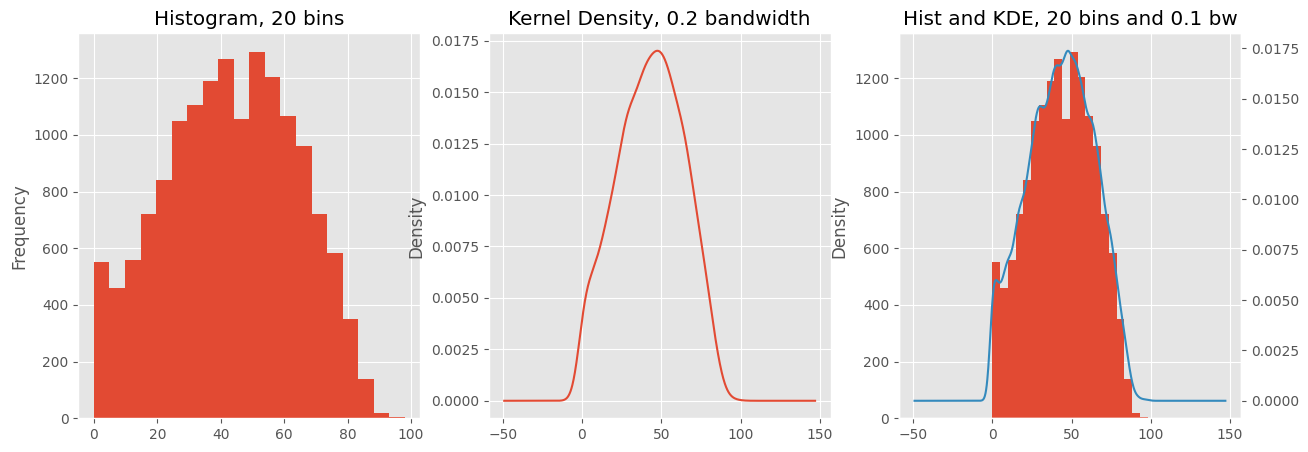

In [4]:
# Start by just plotting what we previously grouped!
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df.Popularity.plot.hist(bins=20)
plt.title('Histogram, 20 bins')

plt.subplot(1,3,2)
df.Popularity.plot.kde(bw_method=0.2)
plt.title('Kernel Density, 0.2 bandwidth')

plt.subplot(1,3,3)
df.Popularity.plot.hist(bins=20)
df.Popularity.plot.kde(bw_method=0.1, secondary_y=True)
plt.title('Hist and KDE, 20 bins and 0.1 bw')

plt.show()

In [ ]:
# Function to plot histogram and KDE with interactive bandwidth adjustment
def plot_kde(bw):
    plt.figure(figsize=(10, 6))
    
    # Plot normalized histogram
    sns.histplot(df.Popularity, bins=20, alpha=0.6, stat='density', label='Histogram')
    
    # Plot KDE
    sns.kdeplot(df.Popularity, bw_adjust=bw, color='red', label=f'KDE (bw={bw:.2f})')
    
    plt.title(f"Bandwidth = {bw:.2f}")
    plt.legend()
    plt.show()

# Create interactive widget
widgets.interact(plot_kde, bw=(0.01, 0.60, 0.02), __manual=True)

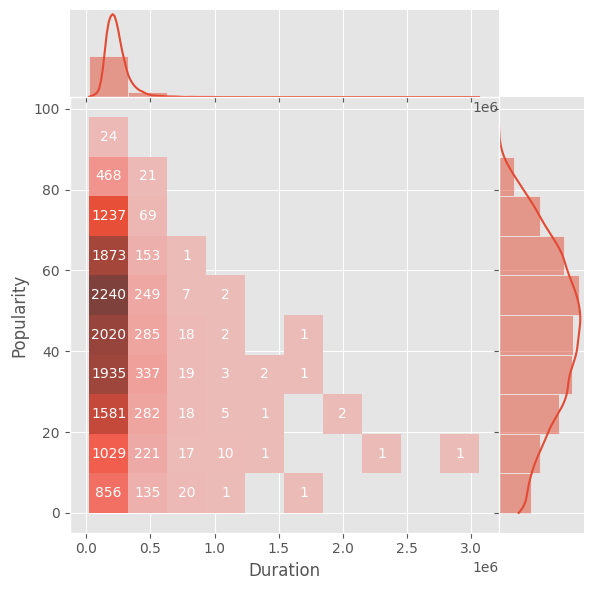

In [5]:
# Create the JointGrid object
g = sns.JointGrid(data=df, x="Duration", y="Popularity", space=0)

# Plot the 2D histogram with KDE on the margins
g.plot_marginals(sns.histplot, kde=True, bins=10)

# Set the aspect ratio of the x-axis marginal plot
#g.ax_marg_x.set_aspect(1.0 / g.ax_marg_x.get_data_ratio(), adjustable='box')

# Add the 2D histogram to the central plot
ax = g.ax_joint
sns.histplot(x='Duration', y='Popularity', data=df, bins=10, ax=ax)

# Now add text annotations to the histogram cells
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2

for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='white')

# Display the plot
plt.show()

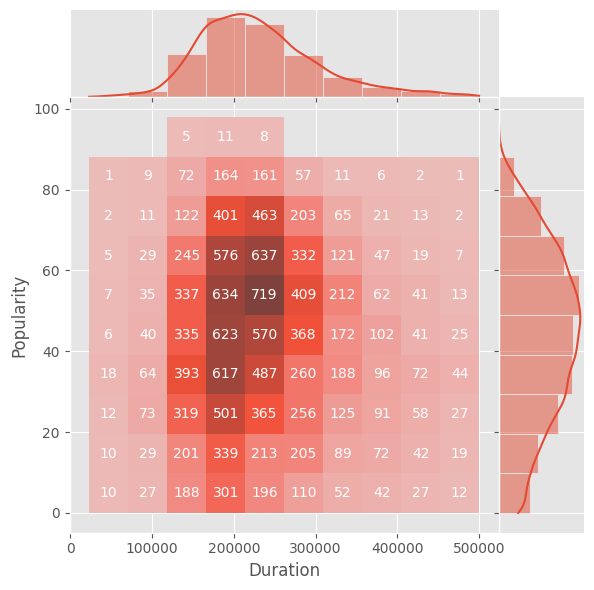

In [6]:
filtered_df = df[df['Duration'] < 500000]
#print(filtered_df)

# Create the JointGrid object
g2 = sns.JointGrid(data=filtered_df, x="Duration", y="Popularity", space=0)

# Plot the 2D histogram with KDE on the margins
g2.plot_marginals(sns.histplot, kde=True, bins=10)

# Set the aspect ratio of the x-axis marginal plot
#g.ax_marg_x.set_aspect(1.0 / g.ax_marg_x.get_data_ratio(), adjustable='box')

# Add the 2D histogram to the central plot
ax = g2.ax_joint
sns.histplot(x='Duration', y='Popularity', data=filtered_df, bins=10, ax=ax)

# Now add text annotations to the histogram cells
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2

for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='white')

# Display the plot
plt.show()

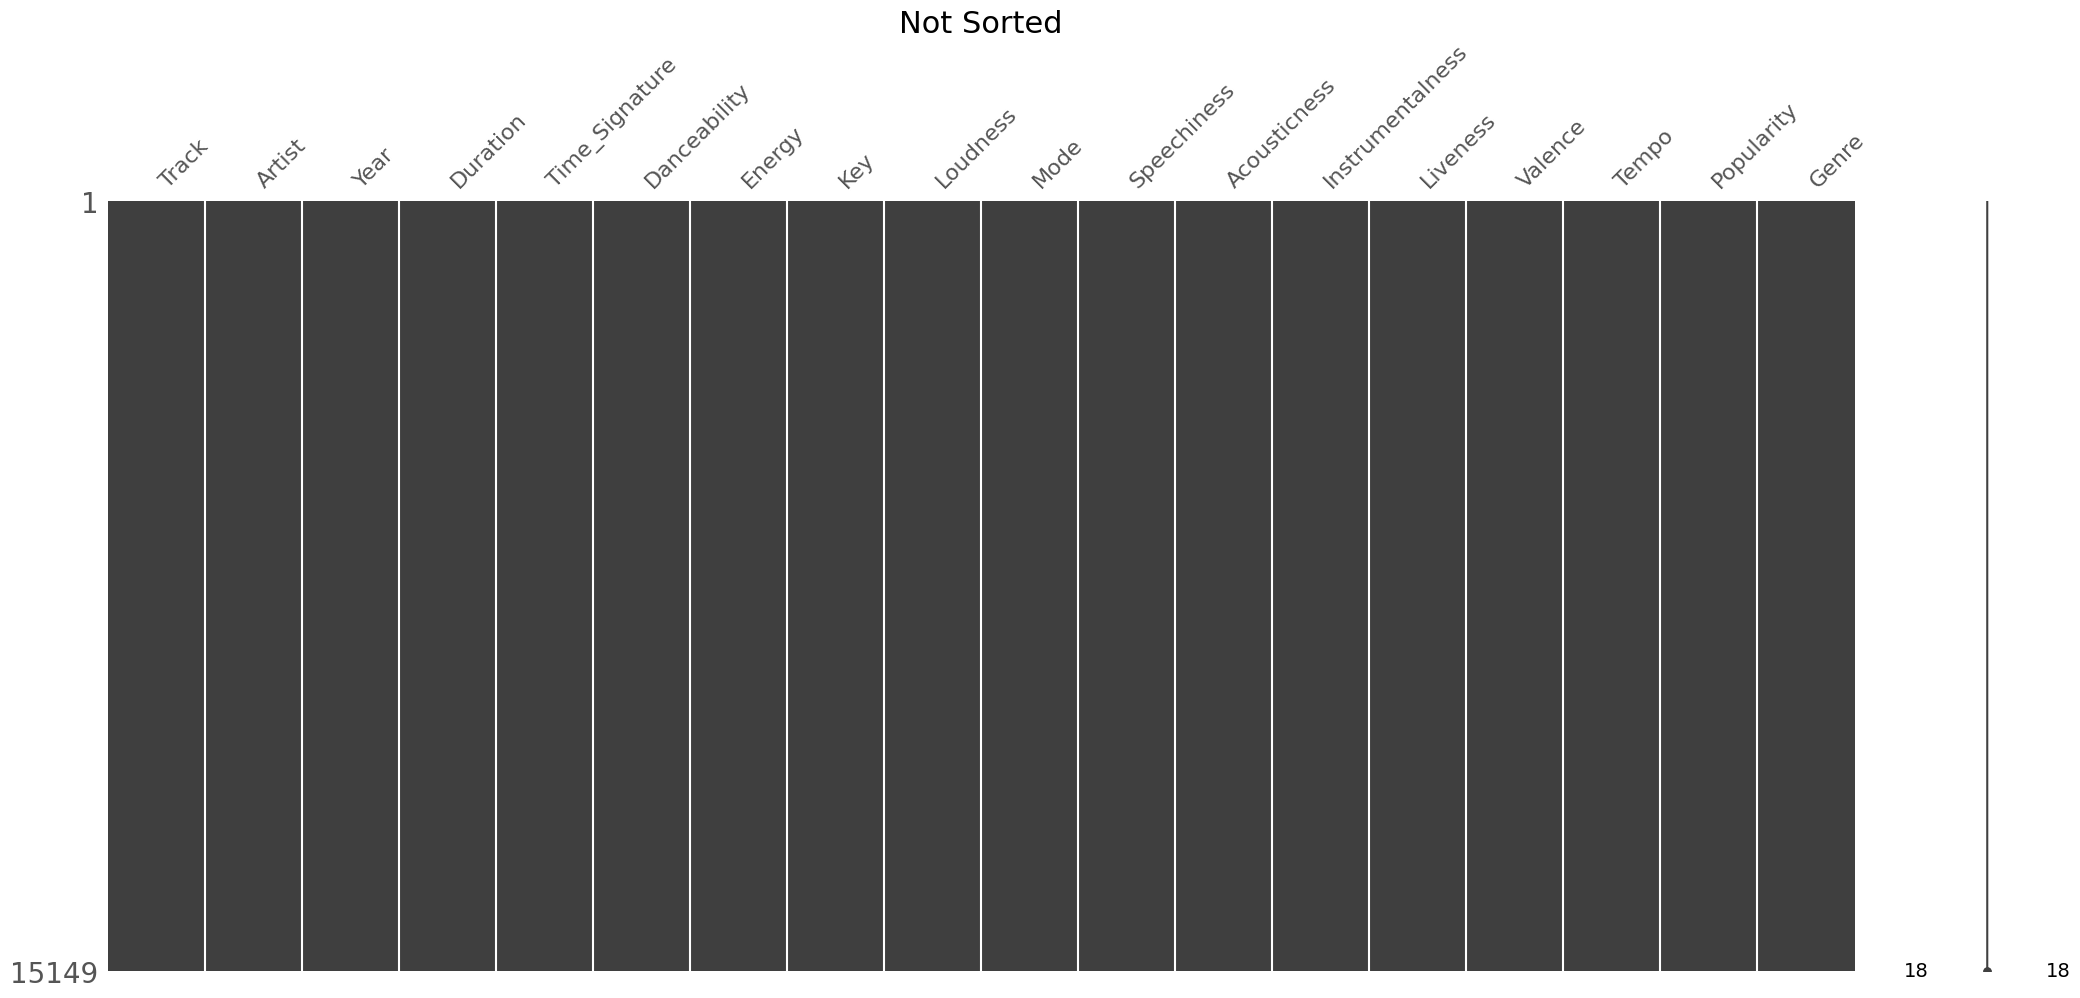

In [7]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.show()

In [8]:
# let's break up the age variable into a discrete new variable
df['Era'] = pd.cut(df['Year'],
                            [0,1985,2027],
                            labels=['Before1985','After1985']) # this creates a new variable
df.Era.describe()

count          15149
unique             2
top       Before1985
freq            8303
Name: Era, dtype: object

C:\Users\chris\AppData\Local\Temp\ipykernel_16892\28527685.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['Genre','Era'])


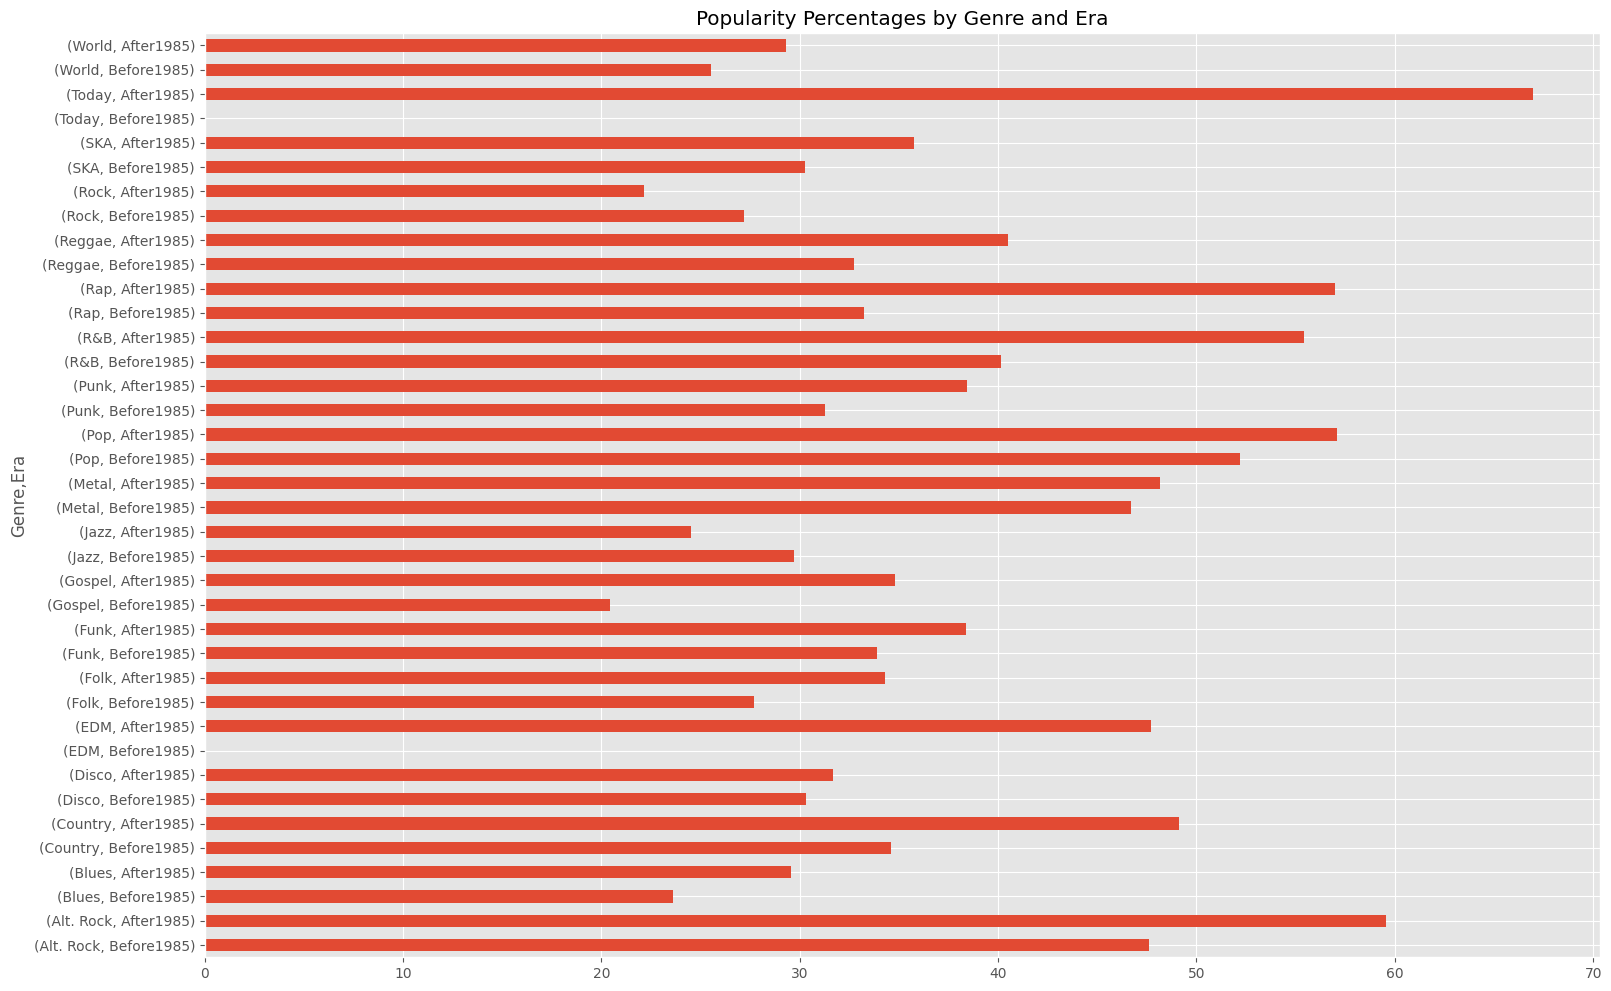

In [9]:
# first group the data
df_grouped = df.groupby(by=['Genre','Era'])

# tabulate survival rates of each group
Popularity_rate = df_grouped.Popularity.sum() / df_grouped.Popularity.count()


plt.figure(figsize=(18, 12))
# show in a bar chart using builtin pandas API
ax = Popularity_rate.plot(kind='barh')
plt.title('Popularity Percentages by Genre and Era')
plt.show()

The "Popularity Percentages by Genre and Era" shows the average popularity rate of songs delineated by genre and era. The table shows that World music before 1982 has the highest popularity rate at about 67%. Alt. Rock music after 1985 has the 2nd highest popularity rate at about 59%. This table also shows that the EDM and Today genres were highly unpopular before 1982 because each have a popularity rate of 0%.

<Figure size 1800x1200 with 0 Axes>

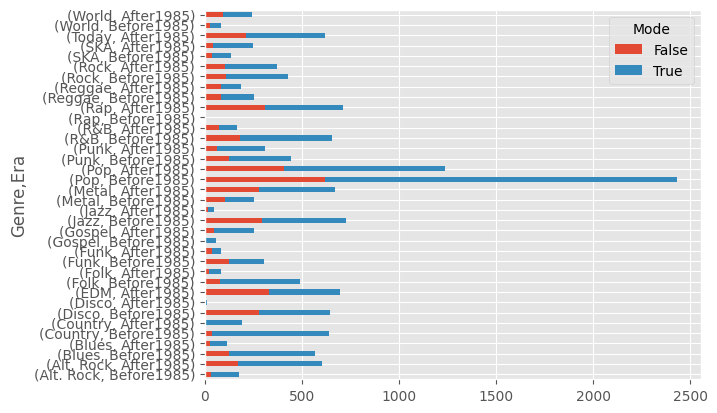

In [10]:
# the cross tab operator provides an easy way to get these numbers
survival = pd.crosstab([df['Genre'],
                        df['Era']], # categories to cross tabulate
                       df.Mode.astype(bool)) # how to group

plt.figure(figsize=(18, 12))
survival.plot(kind='barh', stacked=True)
plt.show()

This plot depicts the number of songs in each genre and era by mode (major or minor). This dataset consists of mainly pop songs, considering that it contains nearly 2500 pop songs from before 1982 and nearly 1250 pop songs from after 1982. These two statistics make up the highest and 2nd highest number of songs in the dataset. Rap music from before 1982 has the lowest number of songs, and disco music after 1982 has the second lowest number of songs. Additionally, this plot shows that the majority of songs are in a major key rather than a minor key.

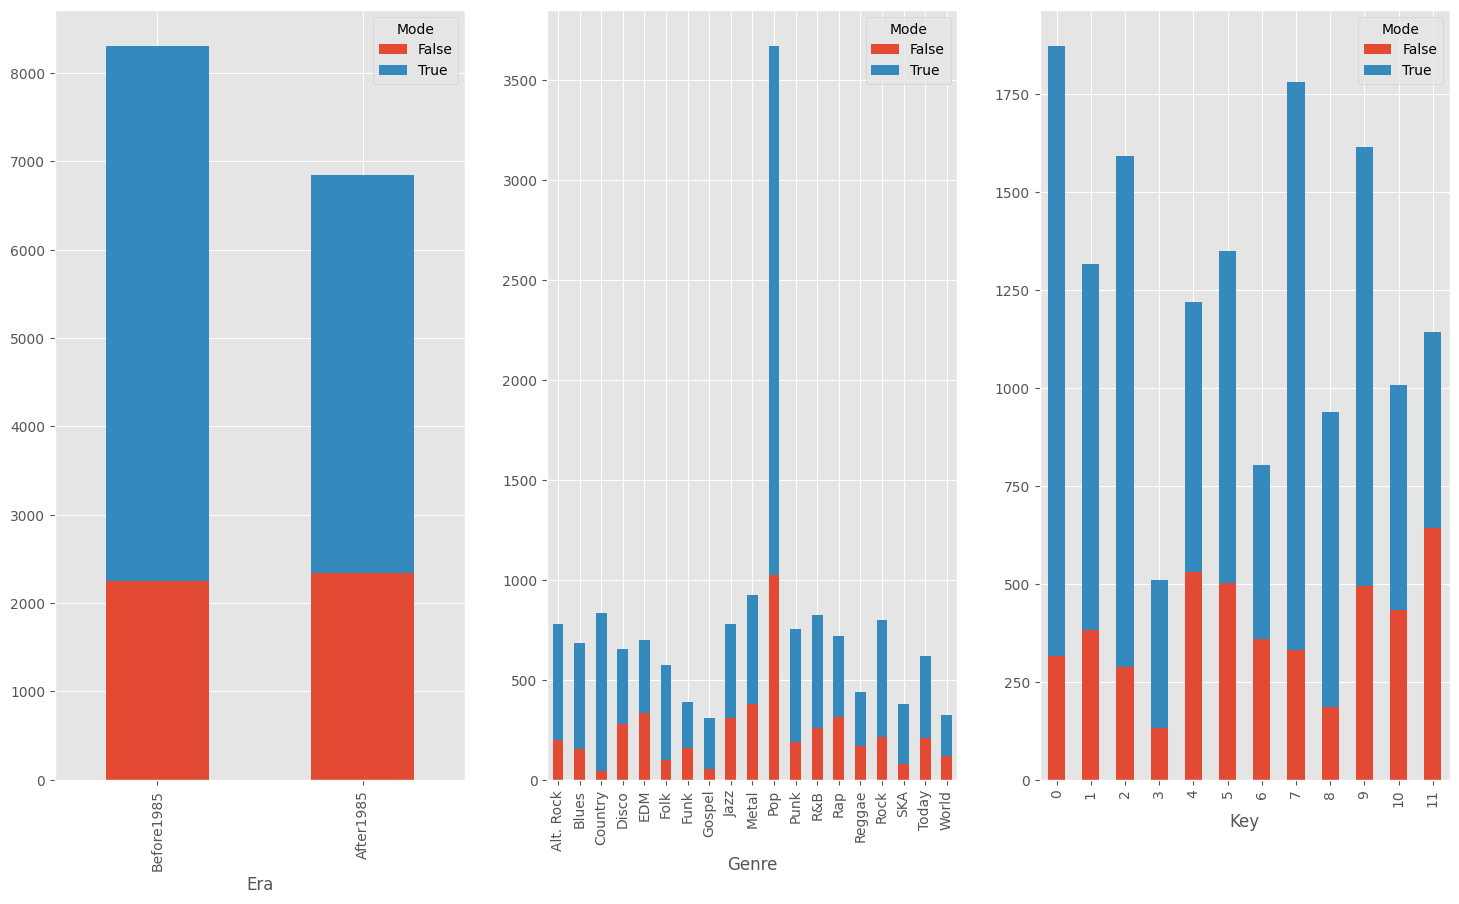

In [11]:
# plot overall cross tab with both groups
plt.figure(figsize=(18, 10))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

pd.crosstab([df['Era']], # categories to cross tabulate
            df.Mode.astype(bool)).plot(kind='bar', stacked=True, ax=ax1) 

pd.crosstab([df['Genre']], # categories to cross tabulate
            df.Mode.astype(bool)).plot(kind='bar', stacked=True, ax=ax2) 

pd.crosstab([df['Key']], # categories to cross tabulate
            df.Mode.astype(bool)).plot(kind='bar', stacked=True, ax=ax3) 

plt.show()

#FUCK FUCK FUCK

The first bar plot displays the count of songs before 1982 and after 1982 by mode. The dataset included more songs from before 1982 than after 1982, as it has over 8000 songs before 1982 and under 7000 songs after 1982. In both songs from before 1982 and songs from 1982, the majority of songs are in a major key.

The second bar plot shows the count of songs in each genre by mode. This plot reinforces that the dataset consist of mostly pop music. Most genres are dominated by major keys, but a few genres, such as EDM, metal, and rap, have a nearly 50/50 split of major and minor keys.

The third bar plot depicts the count of songs in each key by mode. The key of C has the highest number of songs, and the key of G has the second highest number of songs in this dataset. Both keys have a majority of songs in major rather than minor. The key of Ef has the lowest number of songs and is also mostly in a major key. The key of B is the only key with a majority of songs in a minor key.

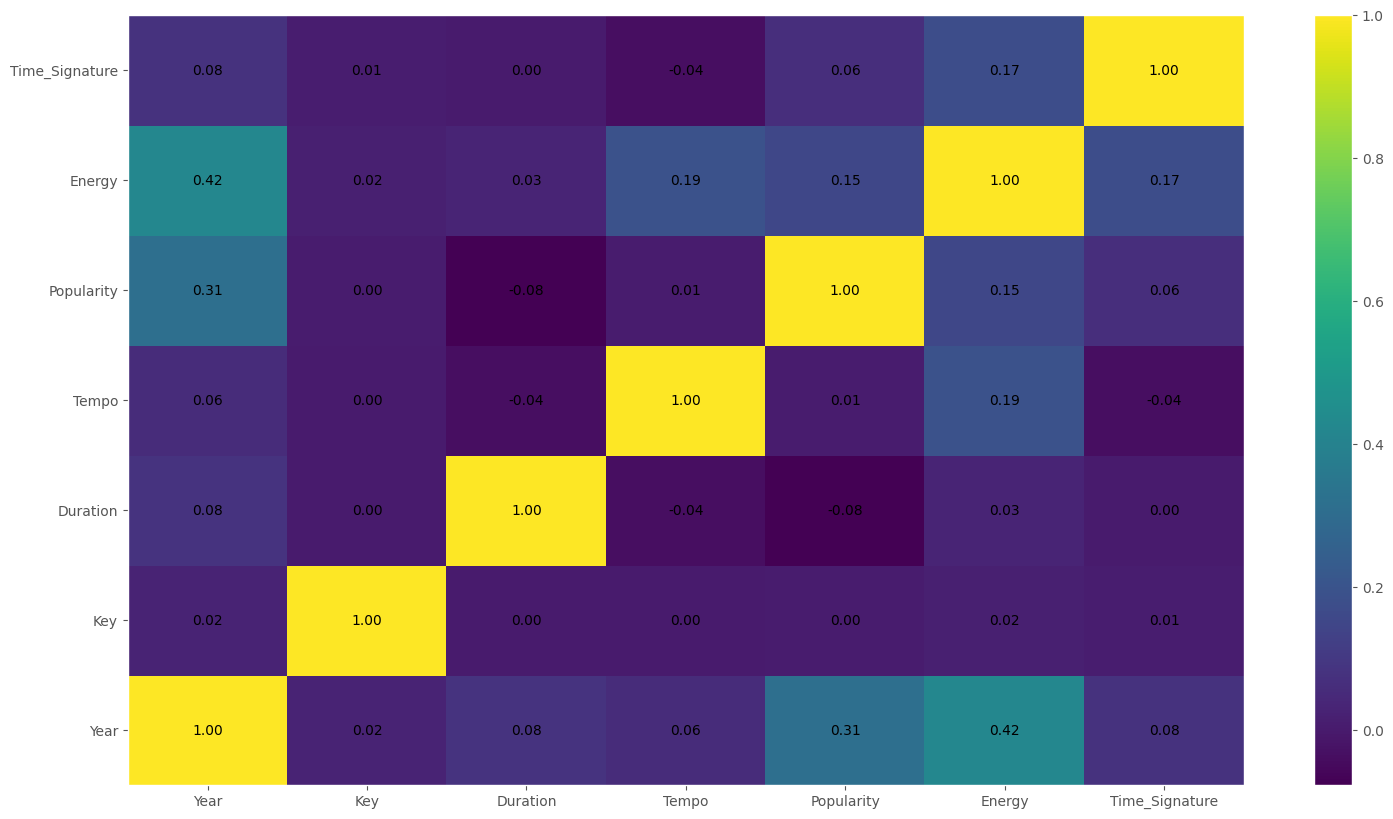

In [12]:
# plot the correlation matrix 
vars_to_use = ['Year', 'Key', 'Duration', 'Tempo', 'Popularity', 'Energy', 'Time_Signature'] # pick vars
corr_matrix = df[vars_to_use].corr()

plt.figure(figsize=(18,10))

plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()

# Add ticks for variables
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)

# Annotate each cell with the correlation coefficient
for i in range(len(vars_to_use)):
    for j in range(len(vars_to_use)):
        plt.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.2f}', 
                 ha='center', va='center', color='black')
        
plt.show()

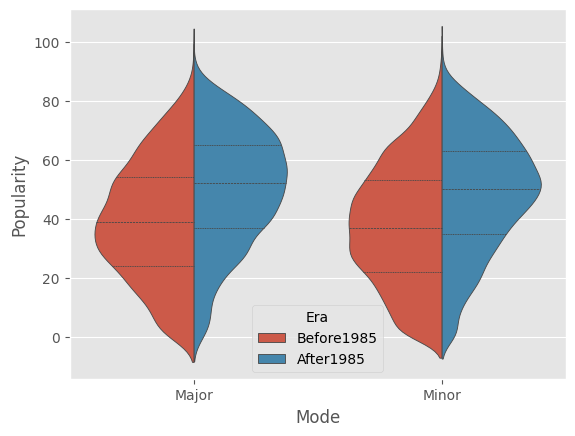

In [13]:
sns.violinplot(x="Mode", y="Popularity", hue="Era", data=df, 
               split=True, # split across violins
               inner="quart") # show innner stats like mean, IQR, 
               
# Set custom x-axis labels
plt.xticks(ticks=[0, 1], labels=["Major", "Minor"])

plt.show()

In [67]:
# let's break up the age variable into a discrete new variable
df['Era2'] = pd.cut(df['Year'],
                            [0,1945,1960,1975,1990,2008,2027],
                            labels=['-1945','1946-1960','1961-1975','1976-1990','1991-2008','2009-']) # this creates a new variable
df.Era.describe()

sns.violinplot(x="Mode", y="Popularity", hue="Era2", data=df, 
               split=True, # split across violins
               inner="quart") # show innner stats like mean, IQR, 
               
plt.xticks(ticks=[0, 1], labels=["Major", "Minor"])
plt.show()

ValueError: There must be exactly two hue levels to use `split`.'

## 4. Dimensionality Reduction

### 4.1 Implement

In [70]:
import umap
import umap.plot
import seaborn as sns
from sklearn import preprocessing

df_scaled = df.copy()

for x in ['Track', 'Artist', 'Duration', 'Year', 'Time_Signature', 'Danceability',
          'Key', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
          'Genre', 'Era', 'Era2']:
    if x in df_scaled:
        del df_scaled[x]

df_scaled_2 = df.copy()
for x in ['Track', 'Artist', 'Genre', 'Era', 'Era2']:
    if x in df_scaled_2:
        del df_scaled_2[x]

df_scaled = pd.DataFrame(df_scaled)
df_scaled.head

<bound method NDFrame.head of        Energy  Loudness  Valence    Tempo  Popularity
0       0.511   -15.894    0.604  132.015          40
1       0.459   -17.453    0.963  133.351          43
2       0.816    -7.293    0.519   99.978          12
3       0.385   -10.057    0.494  117.913          47
4       0.876    -6.310    0.867  104.970          43
...       ...       ...      ...      ...         ...
15144   0.659   -10.826    0.528  154.171          47
15145   0.737    -7.042    0.808  105.754          18
15146   0.730   -11.056    0.840  146.213          25
15147   0.378   -16.181    0.551   97.677           8
15148   0.516   -10.325    0.259   83.013           5

[15149 rows x 5 columns]>

### 4.2 Visualize and Interpret

<Axes: >

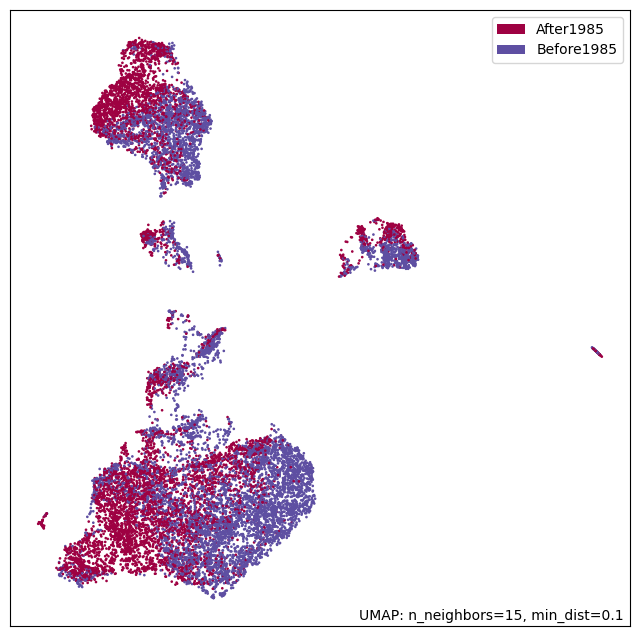

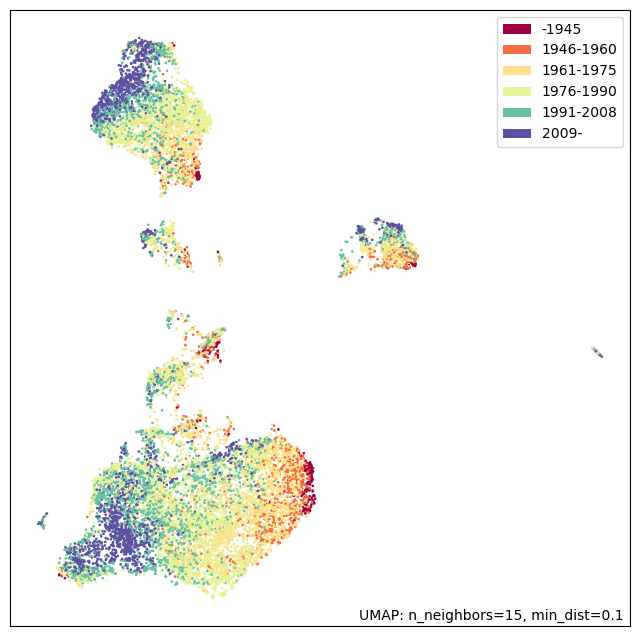

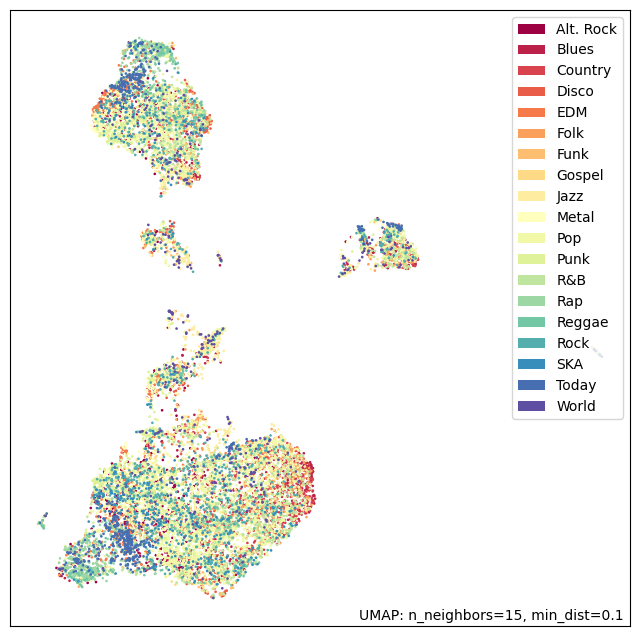

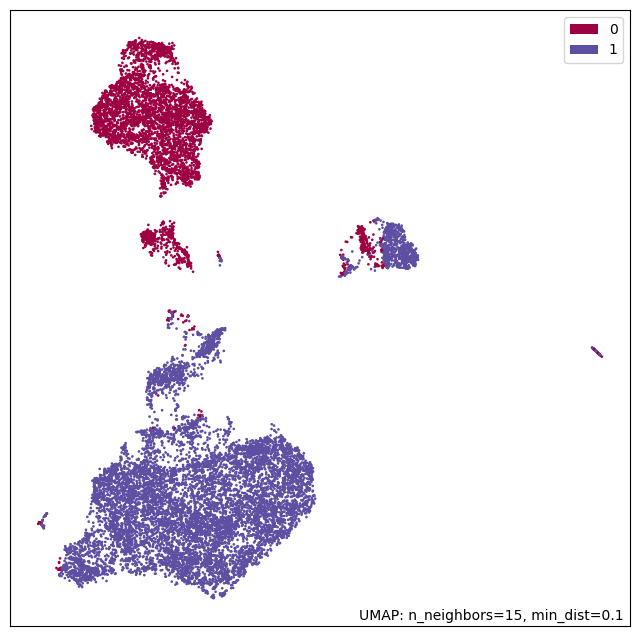

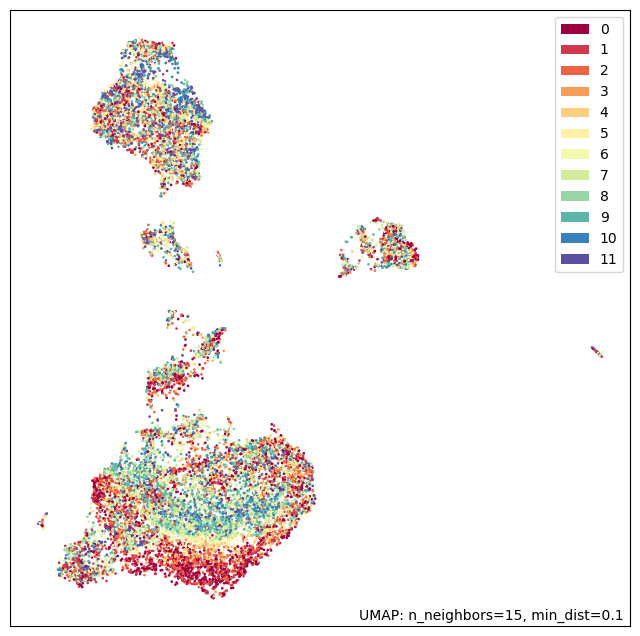

In [71]:
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP()

#df_scaled = StandardScaler().fit_transform(df_scaled)
df_scaled_2 = StandardScaler().fit_transform(df_scaled_2)
embedding = reducer.fit_transform(df_scaled_2)
#embedding = reducer.fit_transform(df_scaled)
embedding.shape
umap.plot.points(reducer, labels=df['Era'])
umap.plot.points(reducer, labels=df['Era2'])
umap.plot.points(reducer, labels=df['Genre'])
umap.plot.points(reducer, labels=df['Mode'])
umap.plot.points(reducer, labels=df['Key'])


As we saw in many of the graphs of our data, it is difficult to come to many conclusions about the dataset, as there doesn't appear to be a strong correlation between any of the values, which became increasingly worse with dimensionality reduction. I elected to keep the variables "Energy", "Loudness", "Valence", "Tempo", and "Popularity" as the variables in the dimensionality reduction, and then compared them to the variables "Era", "Genre", "Mode", and "Key".

### 4.3 Explanation of UMAP Dimensionality Reduction Methods